<a href="https://colab.research.google.com/github/Nivedasudeep/CodeAlpha_DataVisualization/blob/main/Task4_SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv("Reviews.csv")
df.head()


,ReviewID,Review
0,R1,"I love this product, works perfectly!"
1,R2,"Terrible quality, broke in a week."
2,R3,Very satisfied with the purchase.
3,R4,"Not worth the money, very disappointing."
4,R5,"Amazing experience, highly recommend!"


In [2]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  # keep only letters & spaces
    return text

df["Cleaned_Review"] = df["Review"].apply(clean_text)
df.head()


,ReviewID,Review,Cleaned_Review
0,R1,"I love this product, works perfectly!",i love this product works perfectly
1,R2,"Terrible quality, broke in a week.",terrible quality broke in a week
2,R3,Very satisfied with the purchase.,very satisfied with the purchase
3,R4,"Not worth the money, very disappointing.",not worth the money very disappointing
4,R5,"Amazing experience, highly recommend!",amazing experience highly recommend


In [3]:
!pip install textblob
from textblob import TextBlob

def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

df["Sentiment"] = df["Cleaned_Review"].apply(get_sentiment)
df[["Review", "Sentiment"]].head(10)


,Review,Sentiment
0,"I love this product, works perfectly!",Positive
1,"Terrible quality, broke in a week.",Negative
2,Very satisfied with the purchase.,Positive
3,"Not worth the money, very disappointing.",Negative
4,"Amazing experience, highly recommend!",Positive
5,Product stopped working after a month.,Neutral
6,Great value for money.,Positive
7,Worst purchase ever.,Negative
8,"Pretty decent, met my expectations.",Positive
9,Excellent quality and fast delivery.,Positive


/tmp/ipython-input-2929764773.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Sentiment"], palette="Set2")


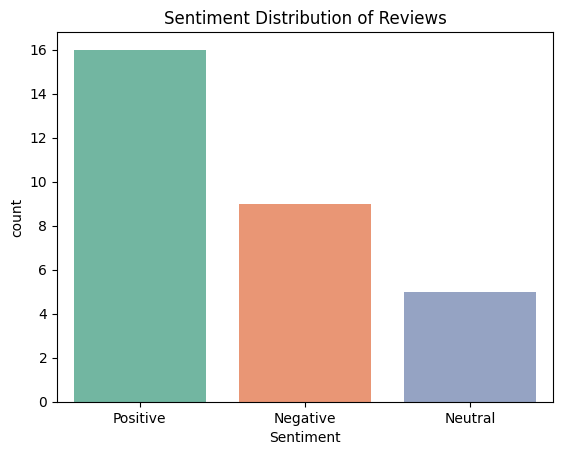

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df["Sentiment"], palette="Set2")
plt.title("Sentiment Distribution of Reviews")
plt.show()


Most reviews are Positive, showing customers are generally satisfied.

A noticeable portion are Negative, highlighting product quality issues.

Some reviews are Neutral, indicating mixed experiences.